# TASK-03

**Problem Statment:**

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GETTING AND READING DATA

In [2]:
df = pd.read_csv('bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA AND PREPROCESSING

In [3]:
df.info()                   #getting information about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.isna().sum()        #checking foer null values                

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.duplicated().sum()        #checking for duplicate values

0

In [6]:
#removing unnecessary columns from dataset
df = df[['age', 'job','marital','education','balance','housing','loan','campaign','pdays','previous','y']]

In [7]:
df.head()

,age,job,marital,education,balance,housing,loan,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,1,-1,0,no


In [8]:
df['marital'].value_counts()        #checks value by marital 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [9]:
df['job'].value_counts()       #checks value by job wise

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [10]:
df['education'].value_counts()           #checks value by education wise

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
df.describe().T                   #getting description of data 

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [12]:
df.corr(numeric_only=True)              #checking statistical correlation between numerical columns

,age,balance,campaign,pdays,previous
age,1.000000,0.097783,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,-0.014578,0.003435,0.016674
campaign,0.004760,-0.014578,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.032855,0.454820,1.000000


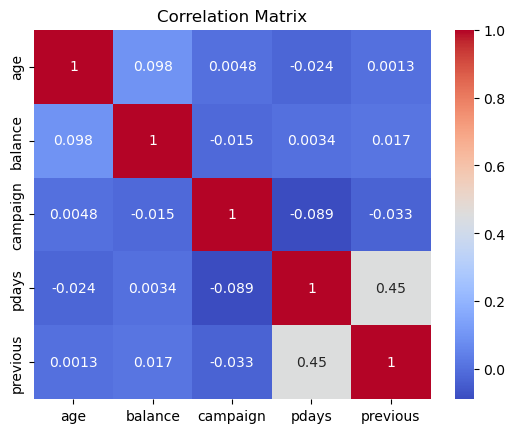

In [13]:
# plotting correlation matrix by using heatmap
sns.heatmap(df.corr(numeric_only = True),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

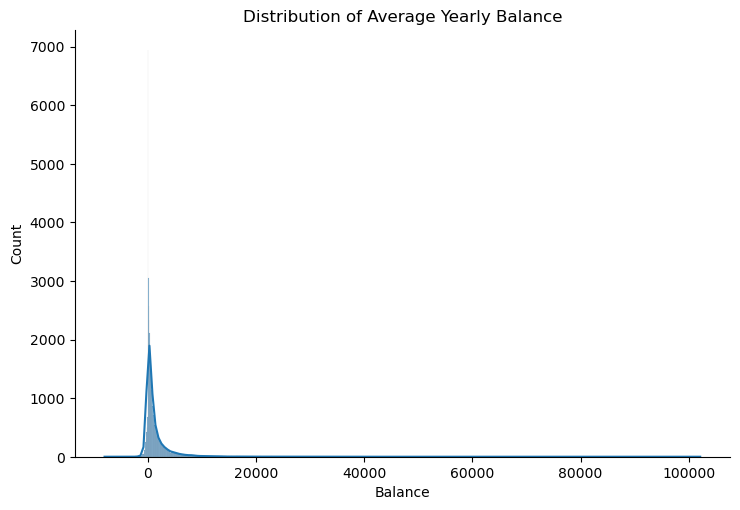

In [14]:
# plotting histogram for average yearly balance
sns.displot(data = df, x='balance', kind ='hist', kde=True, aspect=1.5)
plt.title('Distribution of Average Yearly Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

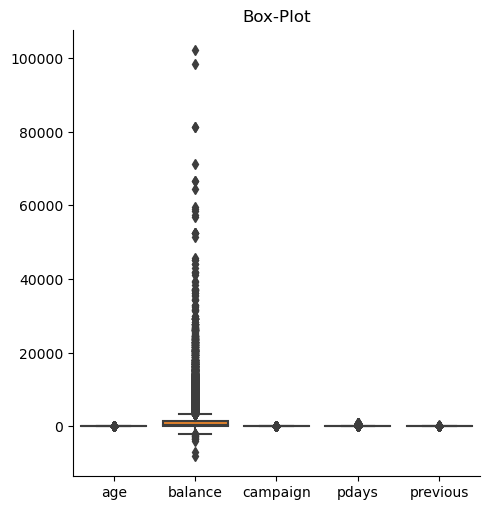

In [15]:
# plotting box-plot to identify outliers
sns.catplot(data=df, kind='box')
plt.title('Box-Plot')
plt.show()

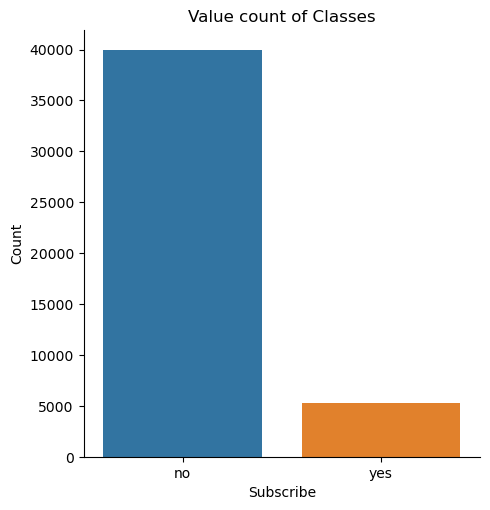

In [16]:
# plotting countplot for target column
sns.catplot(data=df, x='y', kind='count')
plt.title('Value count of Classes')
plt.xlabel('Subscribe')
plt.ylabel('Count')
plt.show()

In [17]:
pd.crosstab(df['y'],df['job']).T  #shows job wise distribution for target values.

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [18]:
pd.crosstab(df['y'],df['education'])     #shows education wise class distribution

education,primary,secondary,tertiary,unknown
y,,,,
no,6260,20752,11305,1605
yes,591,2450,1996,252


In [19]:
df['balance'].skew()              # checking for skewness

8.360308326166326

In [20]:
# using Powertransformer to reduce skewness of the data
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
column_name = 'balance'

df.loc[:, column_name] = pt.fit_transform(df[[column_name]])

# Checking skewness after transformation
df[column_name].skew()

1.0985820972305558

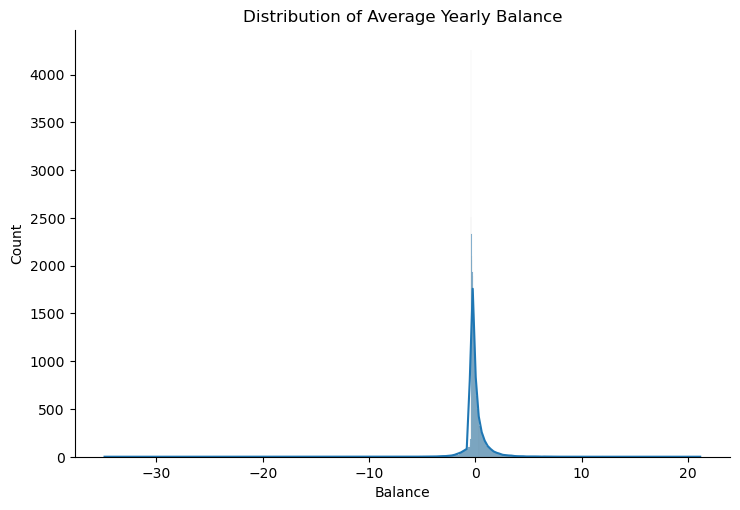

In [21]:
# checking distribution of data
sns.displot(data = df, x='balance', kind ='hist', kde=True, aspect=1.5)
plt.title('Distribution of Average Yearly Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

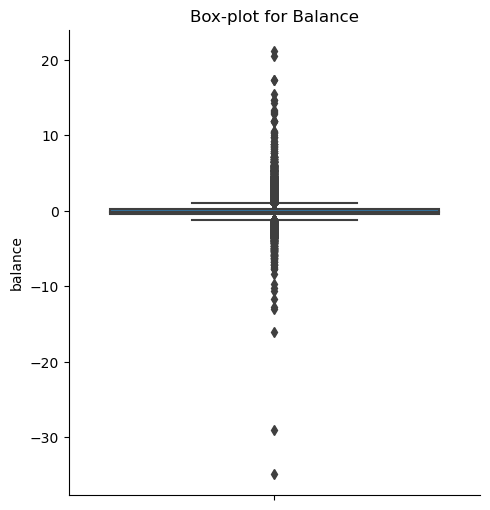

In [22]:
# plotting bo-plot for balance column
sns.catplot(data=df, y='balance', kind='box')
plt.title('Box-plot for Balance')
plt.show()

In [23]:
# Scaling balance coulmn by using standard scaler which scales data with respect to mean
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.loc[:,'balance'] = scaler.fit_transform(df[['balance']])

In [24]:
df['balance'].skew()

1.0985820972305558

In [25]:
del_rows = df[df['balance']<-5].index  
len(del_rows)

62

In [26]:
# droppping row which has balance lesser than -5 
df.drop(del_rows, axis=0, inplace= True)
df.shape         # checks shape of data

(45149, 11)

In [27]:
job_count = df['job'].value_counts()     

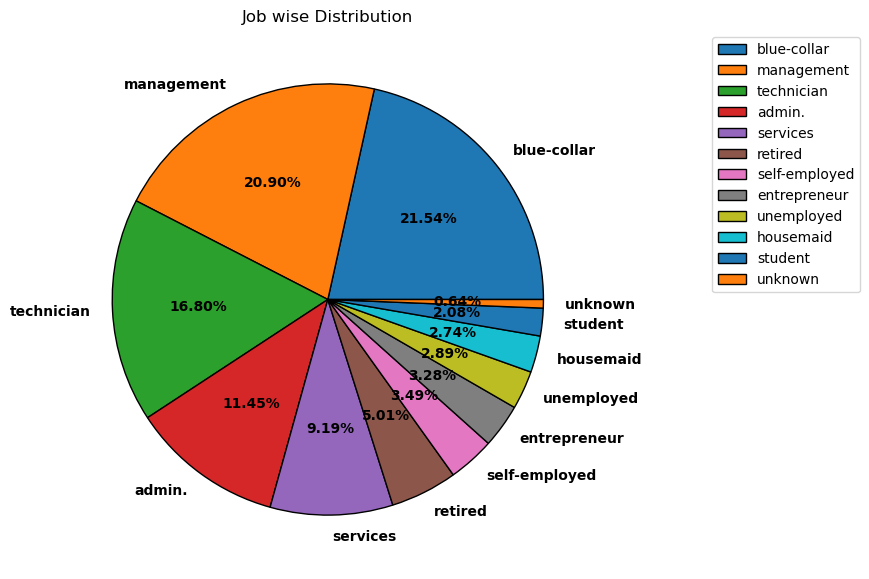

In [28]:
#plotting pie chart to see destribution of data job wise
plt.figure(figsize=(10,7))

plt.pie(job_count, labels=job_count.index, autopct = '%.2f%%',wedgeprops={'linewidth':1,'edgecolor': 'black'},
       textprops={'weight':'bold'})
plt.legend(bbox_to_anchor=(1.5, 1))
plt.title('Job wise Distribution')
plt.show()

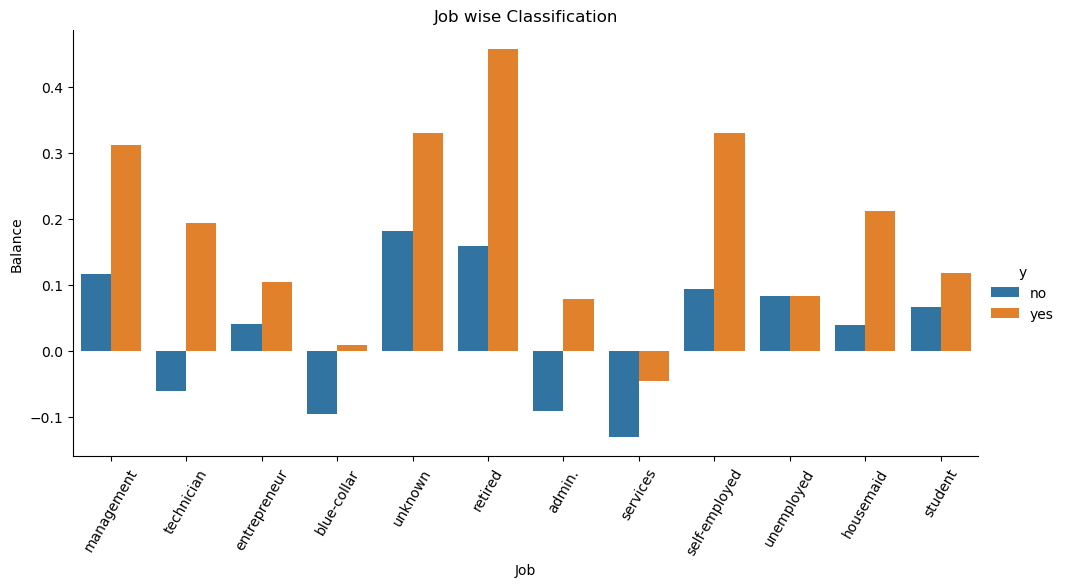

In [29]:
#plotting bar chart 
sns.catplot(data=df, x='job',y='balance',kind='bar',hue='y', aspect=2, errorbar=('ci', False))
plt.title('Job wise Classification')
plt.xlabel('Job')
plt.xticks(rotation = 60)
plt.ylabel('Balance')
plt.show()

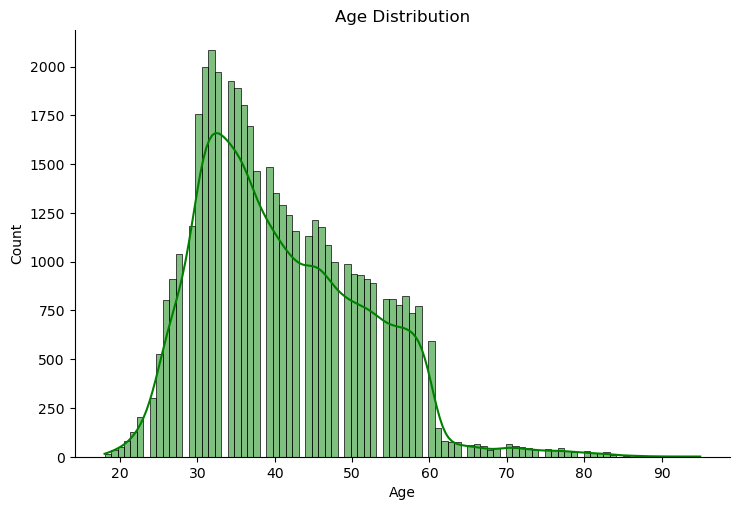

In [30]:
#plotting histogram to see age distribution
sns.displot(data = df, x='age', kind ='hist', kde=True, aspect=1.5, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

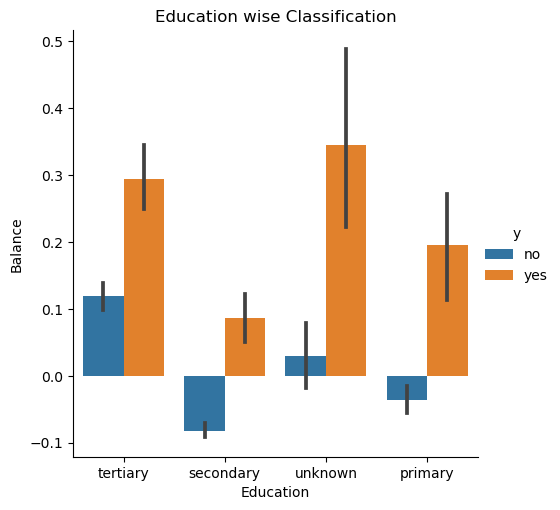

In [31]:
#plotting bar plot to see education wise distribution
sns.catplot(data=df, x='education',y='balance',kind='bar',hue='y')
plt.title('Education wise Classification')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.show()

In [32]:
df.shape

(45149, 11)

In [33]:
df = df[df['balance']>-0.5]      #dropping rows which having budget lesser than -0.5

In [34]:
df.shape

(41925, 11)

**OBSERVATIONS:**

1. The dataset exhibits a significant imbalance, Hence we need to balnced it around somewhat manner to avoid biased predictions.

2. The majority of individuals in the dataset fall within the age range of 25 to 60 years, indicating a concentration of data within this demographic.

3. Notably, the dataset is dominated by individuals with a blue-collar job type. Interestingly, the data suggests that a substantial number of retired individuals have subscribed to the term deposit scheme.

4. The **balance** column displays a high skewness of approximately 8.36, indicating a non-uniform distribution. To enhance the model's performance, it is imperative to reduce this skewness.Also, there are outliers in the balance column. Heance we need to remove this outliers in somewhat manner.

In [35]:
# encoding marital and education column by using one hot encoding.

df = pd.get_dummies(df,columns=['marital','education'])

In [36]:
df.head()

,age,job,balance,housing,loan,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,0.414773,yes,no,1,-1,0,no,0,1,0,0,0,1,0
1,44,technician,-0.410774,yes,no,1,-1,0,no,0,0,1,0,1,0,0
2,33,entrepreneur,-0.431122,yes,yes,1,-1,0,no,0,1,0,0,1,0,0
3,47,blue-collar,0.197685,yes,no,1,-1,0,no,0,1,0,0,0,0,1
4,33,unknown,-0.432119,no,no,1,-1,0,no,0,0,1,0,0,0,1


In [37]:
#collecting all columns which having dtype as object
obj_cols = df.select_dtypes('object').columns

In [38]:
#using label encoder
from sklearn.preprocessing import LabelEncoder

for i in obj_cols:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    
df.dtypes     # checks dtype of columns

age                      int64
job                      int32
balance                float64
housing                  int32
loan                     int32
campaign                 int64
pdays                    int64
previous                 int64
y                        int32
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
dtype: object

In [39]:
df.head()

,age,job,balance,housing,loan,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,4,0.414773,1,0,1,-1,0,0,0,1,0,0,0,1,0
1,44,9,-0.410774,1,0,1,-1,0,0,0,0,1,0,1,0,0
2,33,2,-0.431122,1,1,1,-1,0,0,0,1,0,0,1,0,0
3,47,1,0.197685,1,0,1,-1,0,0,0,1,0,0,0,0,1
4,33,11,-0.432119,0,0,1,-1,0,0,0,0,1,0,0,0,1


In [40]:
#splitting data into x and y
x= df.drop(columns = ['y'], axis = 1)
y = df['y']

In [41]:
x.shape

(41925, 15)

In [42]:
y.shape

(41925,)

In [43]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=0.8, random_state=4)

In [44]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [45]:
model.fit(xtrain,ytrain)  #training model on trining data

DecisionTreeClassifier()

In [46]:
train_pred = model.predict(xtrain)    #predicating target based on training data

In [47]:
from sklearn.metrics import classification_report      #checks metrics of prediction

In [48]:
print(classification_report(ytrain,train_pred))    #prints classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29457
           1       1.00      0.99      1.00      4083

    accuracy                           1.00     33540
   macro avg       1.00      1.00      1.00     33540
weighted avg       1.00      1.00      1.00     33540



In [49]:
test_pred = model.predict(xtest)   #predicting based on test data

print(classification_report(ytest,test_pred))    #printing classification report

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7355
           1       0.25      0.27      0.26      1030

    accuracy                           0.81      8385
   macro avg       0.57      0.58      0.57      8385
weighted avg       0.82      0.81      0.81      8385



In [50]:
from sklearn.ensemble import RandomForestClassifier     #importing random forest classifier

model1 = RandomForestClassifier()

In [51]:
model1.fit(xtrain,ytrain)

RandomForestClassifier()

In [52]:
trainpred = model1.predict(xtrain)

print(classification_report(ytrain,trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29457
           1       1.00      0.99      0.99      4083

    accuracy                           1.00     33540
   macro avg       1.00      0.99      1.00     33540
weighted avg       1.00      1.00      1.00     33540



In [53]:
testpred = model1.predict(xtest)
print(classification_report(ytest,testpred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7355
           1       0.45      0.17      0.24      1030

    accuracy                           0.87      8385
   macro avg       0.67      0.57      0.59      8385
weighted avg       0.84      0.87      0.85      8385



# CONCLUSION

1. As expected, decision trees exhibit a tendency to overfit the training data, achieving a perfect 100% accuracy during training. However, when applied to unseen data, the model's performance drops to around 81%,
2. To solve this problem, first we have tried to balance data in somewhat manner and used **Random Forest Classifier** to minimize overfiting of the model.
3. Random forest is forest of decision trees and it is ensemble technique which use **Bagging**. Random forest model has accuracy on training data 100% while on testing data it gives accuracy around 87%.